# Worksheet 8
# 21MS004

Question 1


$u(0,T)=T_0,u(L,t)=T_0,u(x,o)=T_{init}\\$
$T_0=100K,T_{init}=300 K$

Part b

In [11]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
#Setting up the tridiagonal system and using Thomas algorithm
def solve_by_thomas_algorithm(a, b, c, d):
    """
    Solve a tridiagonal system A x = d using the Thomas algorithm.
    a, b, c are the lower, main, and upper diagonals (each 1D arrays).
    d is the right-hand side array.

    Returns the solution array x.
    """
    N = len(b)
    bp = np.zeros(N, dtype=float)
    cp = np.zeros(N, dtype=float)
    dp = np.zeros(N, dtype=float)
    xs = np.zeros(N, dtype=float)
    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
    for i in range(1, N):
        bp[i] = b[i] - a[i] * cp[i-1]
        dp[i] = d[i] - a[i] * dp[i-1]
        cp[i] = c[i] / bp[i]
        dp[i] = dp[i] / bp[i]
    xs[-1] = dp[-1]
    for i in range(N-2, -1, -1):
        xs[i] = dp[i] - cp[i] * xs[i+1]
    return xs

def solve_heat_equation(params):
    """
    Solve the 1D heat equation using the Crank–Nicolson method with Thomas algorithm.

    params = (α, L, Nx, Nt, Δt, u_boundary, u_ini, r)
      α           -> Thermal diffusivity
      L           -> Length of the domain
      Nx          -> Number of spatial grid points
      Nt          -> Number of time steps
      Δt          -> Time step size
      u_boundary  -> Tuple (u_left, u_right) for Dirichlet BCs
      u_ini       -> Initial temperature profile (1D numpy array of length Nx)
      r           -> α*Δt / (Δx^2)

    Returns:
      ts        -> 1D array of time values
      solutions -> 2D array of shape (Nx, Nt+1),
                   where solutions[:, k] is the solution at time step k.
    """
    α, L, Nx, Nt, Δt, u_boundary, u_ini, r = params

    u = u_ini

    ts = np.linspace(0.0, Nt * Δt, Nt + 1)

    solutions = np.zeros((Nx, Nt + 1))

    for i in range(Nt):
        solutions[:, i] = u

        d = np.zeros(Nx, dtype=float)
        for j in range(Nx):
            d[j] = (1 - r) * u[j]
            if j > 0:
                d[j] += r / 2 * u[j-1]
            if j < Nx - 1:
                d[j] += r / 2 * u[j+1]

        d[0] += r * u_boundary[0]
        d[-1] += r * u_boundary[1]

        b = (1 + r) * np.ones(Nx)
        a = np.concatenate(([0], -r / 2 * np.ones(Nx - 1)))
        c = np.concatenate((-r / 2 * np.ones(Nx - 1), [0]))

        u = solve_by_thomas_algorithm(a, b, c, d)

        u[0], u[-1] = u_boundary#Enforce boundary condition

    solutions[:, -1] = u

    return ts, solutions

Part c

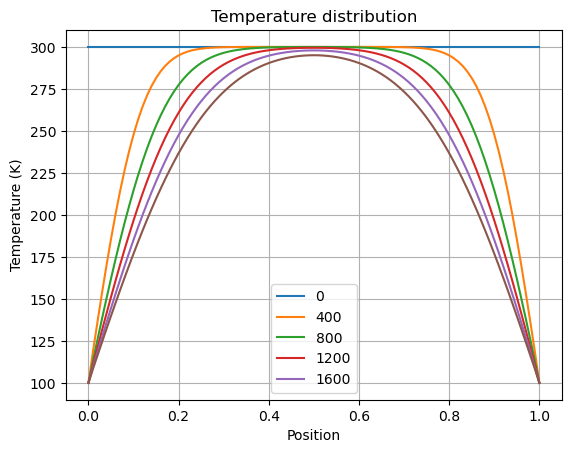

In [12]:
#Defining the parameters and plotting the solutions

α = 1.0e-4
L = 1.0#Assume length to be 1
Nx = 101
Nt = 2000
Δt = 0.1
u_boundary = (100.0,100.0)

Δx = L/(Nx-1)
r = α*Δt/(Δx*Δx)

xs = np.linspace(0.0, L, Nx)

# Initial condition: uniform temparature-300 K
u_ini = 300 * np.ones(Nx)
# Pack trial parameters
params = α, L, Nx, 2, Δt, u_boundary, u_ini, r

# Compile
ts, solutions = solve_heat_equation(params)

# Pack parameters
params = α, L, Nx, Nt, Δt, u_boundary, u_ini, r

# Final run
ts, solutions = solve_heat_equation(params)

# Plot
plt.plot(xs,solutions[:,::400])
plt.xlabel("Position")  
plt.ylabel("Temperature (K)") 
plt.legend(np.arange(0, Nt, 400))
plt.title("Temperature distribution")
plt.grid()

As time increases the temperature distribution seems to be approaching gaussian but its also observed that height of the peak is decreasing with time. So as time tends to infinity probably the temperature throughout the road will become 100K

Question 2


$T_{left} = 200 K,T_{right} = 400 K$
$u(x,0) = T_{init}(x) = 300 + exp(−(x − L/2)^2/2σ^2),σ=0.05,\alpha=10^-4$

In [14]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
#Setting up the tridiagonal system and using Thomas algorithm
def solve_by_thomas_algorithm(a, b, c, d):
    """
    Solve a tridiagonal system A x = d using the Thomas algorithm.
    a, b, c are the lower, main, and upper diagonals (each 1D arrays).
    d is the right-hand side array.

    Returns the solution array x.
    """
    N = len(b)
    bp = np.zeros(N, dtype=float)
    cp = np.zeros(N, dtype=float)
    dp = np.zeros(N, dtype=float)
    xs = np.zeros(N, dtype=float)
    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
    for i in range(1, N):
        bp[i] = b[i] - a[i] * cp[i-1]
        dp[i] = d[i] - a[i] * dp[i-1]
        cp[i] = c[i] / bp[i]
        dp[i] = dp[i] / bp[i]
    xs[-1] = dp[-1]
    for i in range(N-2, -1, -1):
        xs[i] = dp[i] - cp[i] * xs[i+1]
    return xs

def solve_heat_equation(params):
    """
    Solve the 1D heat equation using the Crank–Nicolson method with Thomas algorithm.

    params = (α, L, Nx, Nt, Δt, u_boundary, u_ini, r)
      α           -> Thermal diffusivity
      L           -> Length of the domain
      Nx          -> Number of spatial grid points
      Nt          -> Number of time steps
      Δt          -> Time step size
      u_boundary  -> Tuple (u_left, u_right) for Dirichlet BCs
      u_ini       -> Initial temperature profile (1D numpy array of length Nx)
      r           -> α*Δt / (Δx^2)

    Returns:
      ts        -> 1D array of time values
      solutions -> 2D array of shape (Nx, Nt+1),
                   where solutions[:, k] is the solution at time step k.
    """
    α, L, Nx, Nt, Δt, u_boundary, u_ini, r = params

    u = u_ini

    ts = np.linspace(0.0, Nt * Δt, Nt + 1)

    solutions = np.zeros((Nx, Nt + 1))

    for i in range(Nt):
        solutions[:, i] = u

        d = np.zeros(Nx, dtype=float)
        for j in range(Nx):
            d[j] = (1 - r) * u[j]
            if j > 0:
                d[j] += r / 2 * u[j-1]
            if j < Nx - 1:
                d[j] += r / 2 * u[j+1]

        d[0] += r * u_boundary[0]
        d[-1] += r * u_boundary[1]

        b = (1 + r) * np.ones(Nx)
        a = np.concatenate(([0], -r / 2 * np.ones(Nx - 1)))
        c = np.concatenate((-r / 2 * np.ones(Nx - 1), [0]))

        u = solve_by_thomas_algorithm(a, b, c, d)

        u[0], u[-1] = u_boundary#Enforce boundary condition

    solutions[:, -1] = u

    return ts, solutions

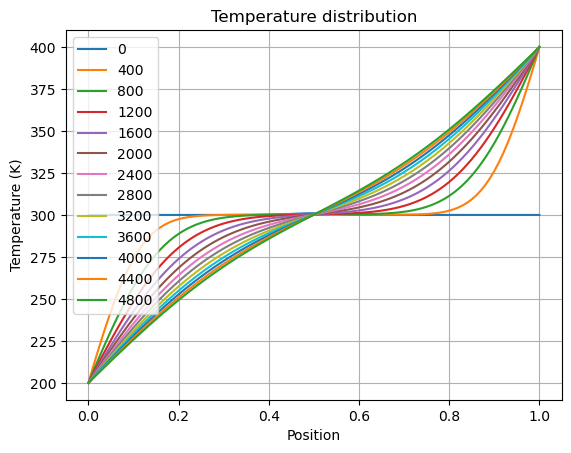

In [18]:
#Defining the parameters and plotting the solutions

α = 1.0e-4
L = 1.0#Assume length to be 1
Nx = 101
Nt = 5000
Δt = 0.1
u_boundary = (200.0,400.0)
σ=0.05
Δx = L/(Nx-1)
r = α*Δt/(Δx*Δx)

xs = np.linspace(0.0, L, Nx)

# Initial condition 
u_ini = 300 + np.exp((-(xs - L/2)**2)/(2*σ**2))
# Pack trial parameters
params = α, L, Nx, 2, Δt, u_boundary, u_ini, r

# Compile
ts, solutions = solve_heat_equation(params)

# Pack parameters
params = α, L, Nx, Nt, Δt, u_boundary, u_ini, r

# Final run
ts, solutions = solve_heat_equation(params)

# Plot
plt.plot(xs,solutions[:,::400])
plt.xlabel("Position")  
plt.ylabel("Temperature (K)") 
plt.legend(np.arange(0, Nt, 400))
plt.title("Temperature distribution")
plt.grid()

We see that eventually the temperature distribution is reaching a linear  steady state from $T_{left}$ to $T_{right}$

Effect of $\Delta t,\Delta x $ and $\alpha$ on convergence speed

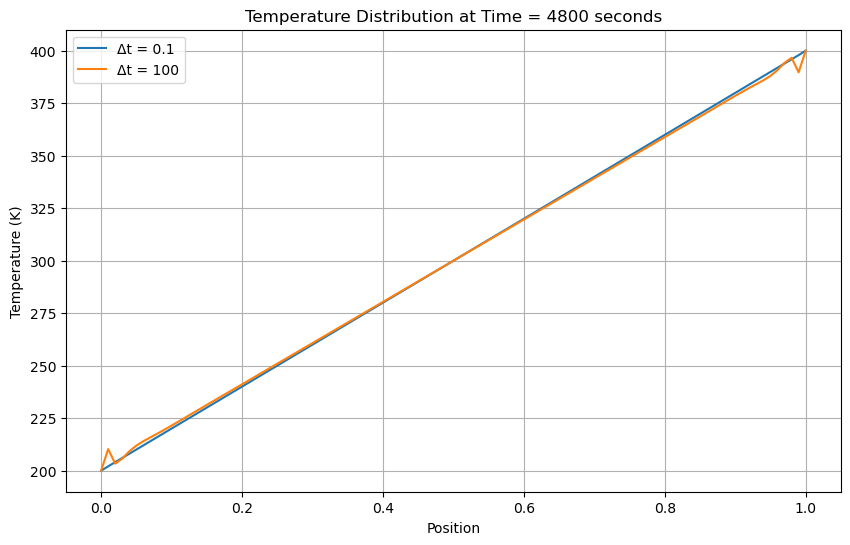

In [23]:
#Defining the parameters and plotting the solutions

α = 1.0e-4
L = 1.0#Assume length to be 1
Nx = 101
Nt = [48000,48]
Δt = [0.1,100]
u_boundary = (200.0,400.0)
σ=0.05
Δx = L/(Nx-1)
sol=[]
xs = np.linspace(0.0, L, Nx)
u_ini = 300 + np.exp((-(xs - L/2)**2)/(2*σ**2))

for i in range(len(Δt)):
    r = α*Δt[i]/(Δx*Δx)
    # Pack parameters
    params = α, L, Nx, Nt[i], Δt[i], u_boundary, u_ini, r
    ts, solutions = solve_heat_equation(params)
    sol.append(solutions[:, -1])

# Plotting the results
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for i in range(len(Δt)):
    plt.plot(xs, sol[i], label=f"Δt = {Δt[i]}")

plt.xlabel("Position")
plt.ylabel("Temperature (K)")
plt.title(f"Temperature Distribution at Time = {Nt[i]*Δt[i]} seconds")
plt.legend()
plt.grid()
plt.show()

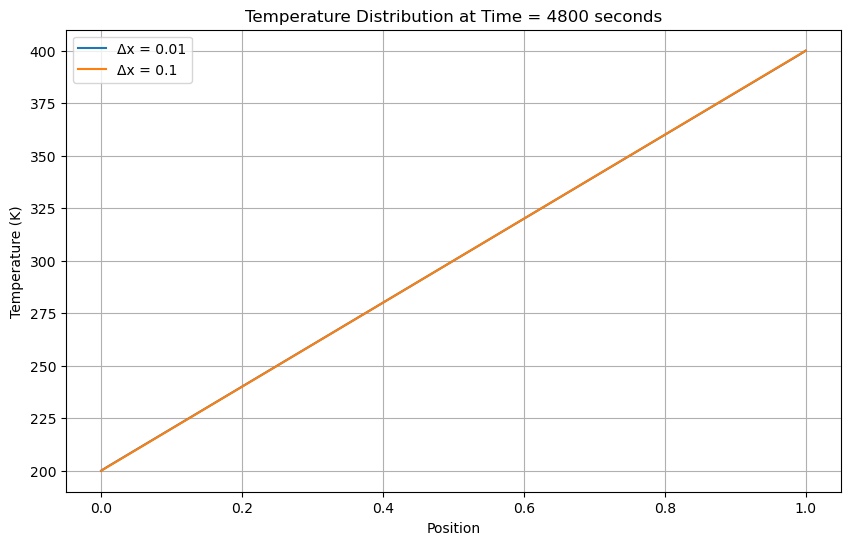

In [25]:
#Defining the parameters and plotting the solutions

α = 1.0e-4
L = 1.0#Assume length to be 1
Nx = [101,11]
Nt = 48000
Δt = 0.1
u_boundary = (200.0,400.0)
σ=0.05
sol=[]
Δxl=[]
xsl=[]
for i in range(len(Nx)):
    Δx = L/(Nx[i]-1)
    Δxl.append(Δx)
    r = α*Δt/(Δx*Δx)
    xs = np.linspace(0.0, L, Nx[i])
    xsl.append(xs)
    u_ini = 300 + np.exp((-(xs - L/2)**2)/(2*σ**2))
    params = α, L, Nx[i], Nt, Δt, u_boundary, u_ini, r
    ts, solutions = solve_heat_equation(params)
    sol.append(solutions[:, -1])

# Plotting the results
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for i in range(len(Nx)):
    plt.plot(xsl[i], sol[i], label=f"Δx = {Δxl[i]}")

plt.xlabel("Position")
plt.ylabel("Temperature (K)")
plt.title(f"Temperature Distribution at Time = 4800 seconds")
plt.legend()
plt.grid()
plt.show()

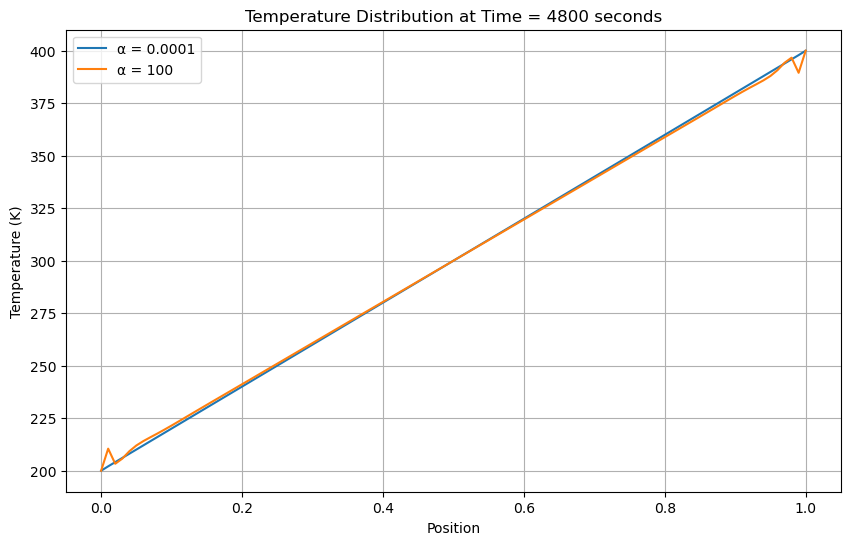

In [26]:
#Defining the parameters and plotting the solutions

αl = [1.0e-4,100]
L = 1.0#Assume length to be 1
Nx = 101
Nt = 48000
Δt = 0.1
u_boundary = (200.0,400.0)
σ=0.05
sol=[]
xs = np.linspace(0.0, L, Nx)
Δx = L/(Nx-1)
for i in range(len(αl)):
    r = αl[i]*Δt/(Δx*Δx)
    # Pack parameters
    u_ini = 300 + np.exp((-(xs - L/2)**2)/(2*σ**2))
    params = αl[i], L, Nx, Nt, Δt, u_boundary, u_ini, r
    ts, solutions = solve_heat_equation(params)
    sol.append(solutions[:, -1])

# Plotting the results
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for i in range(len(αl)):
    plt.plot(xs, sol[i], label=f"α = {αl[i]}")

plt.xlabel("Position")
plt.ylabel("Temperature (K)")
plt.title(f"Temperature Distribution at Time = 4800 seconds")
plt.legend()
plt.grid()
plt.show()

It is observed that lower values of $\Delta t,\Delta x$ and $\alpha$ lead to better convergence of the solutuon